In [2]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 11.9 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [4]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 4.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 21.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.7-cp312-cp312-linux_x86_64.whl size=1046040 sha256=8de548c55012496c044ef778208cfc5e96987a45a9bb7c8fde347ed5dde014e6
  Stored in directory: /home/codespace/.cache/pip/wheels/d8/b7/b5/bc5cfc21613ff88ce55cf4151a9f32e23bd8f4a2c4d51e7c8b
Successfully built peewee

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
import yfinance as yf

In [9]:
msft = yf.Ticker("MSFT")

# get all stock info
msft.info

# get historical market data
hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
msft.history_metadata

# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.capital_gains  # only for mutual funds & etfs

# show share count
msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
msft.calendar
msft.sec_filings
# - income statement
msft.income_stmt
msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
msft.major_holders
msft.institutional_holders
msft.mutualfund_holders
msft.insider_transactions
msft.insider_purchases
msft.insider_roster_holders

msft.sustainability

# show recommendations
msft.recommendations
msft.recommendations_summary
msft.upgrades_downgrades

# show analysts data
msft.analyst_price_targets
msft.earnings_estimate
msft.revenue_estimate
msft.earnings_history
msft.eps_trend
msft.eps_revisions
msft.growth_estimates

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

# # get option chain for specific expiration
# opt = msft.option_chain('2028-01-1')
# # data available via: opt.calls, opt.puts

[{'uuid': '42602ebd-aac5-3fc1-a5a3-ab6af34641d7',
  'title': 'KeyBanc Adjusts Price Target on Microsoft to $575 From $505',
  'publisher': 'MT Newswires',
  'link': 'https://finance.yahoo.com/news/keybanc-adjusts-price-target-microsoft-121945821.html',
  'providerPublishTime': 1730377185,
  'type': 'STORY',
  'relatedTickers': ['MSFT']},
 {'uuid': 'b529e008-39c4-340e-818c-37653af37cfd',
  'title': 'Dow Jones Futures Fall As Microsoft, Meta Slide, Robinhood Dives; Inflation Data Due',
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/b529e008-39c4-340e-818c-37653af37cfd/dow-jones-futures-fall-as.html',
  'providerPublishTime': 1730377003,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/IYaoXKbG4mCeiK63QPUEUw--~B/aD01NjM7dz0xMDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/42ec45a676173a5ac3337427561ad03b',
     'width': 1000,
     'height': 563,
     'tag': 'original'},
    {'url': 'https://s.yimg.

In [18]:
# Define the ticker symbol
ticker_symbol = "^NSEI"  # Nifty 50 index symbol
start_date = '2001-01-01'
# import datetime and 
import datetime
today = datetime.date.today()
min_start_date = today - datetime.timedelta(days=729)
# Fetch the data
data_daily = yf.download(tickers=ticker_symbol, start = start_date, interval='1d')
data_hourly = yf.download(tickers=ticker_symbol, start = min_start_date, interval='1h')
# Display the data
data_daily.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2007-09-17 00:00:00+00:00,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18 00:00:00+00:00,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19 00:00:00+00:00,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20 00:00:00+00:00,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21 00:00:00+00:00,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0


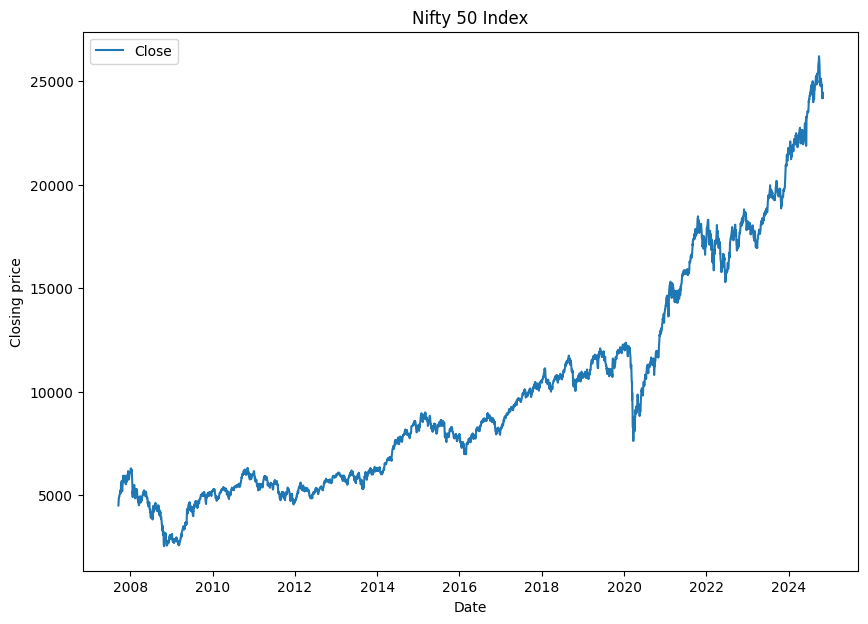

In [20]:
# Plot the data
plt.figure(figsize=(10, 7))
plt.plot(data_daily['Close'], label='Close')
plt.title('Nifty 50 Index')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()


In [ ]:
# plot the hourly data
def plot_stock_data(data, title):
    plt.figure(figsize=(10, 7))
    plt.plot(data['Close'], label='Close')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing price')
    plt.legend()
    plt.show()
plot_stock_data(data_hourly, 'Nifty 50 Index (Hourly data)')

# Decompose the time series data


In [ ]:
df = pd.read_csv('')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961
...,...,...,...
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980


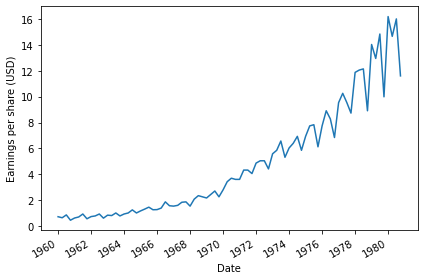

In [4]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)

In [5]:
advanced_decomposition = STL(df.data, period=4).fit()

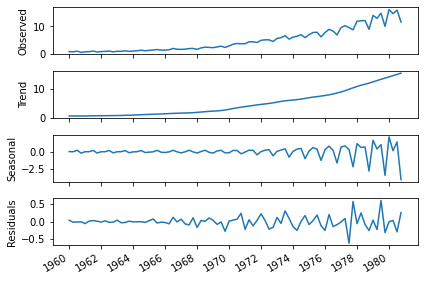

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F02_peixeiro.png', dpi=300)

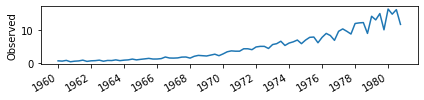

In [7]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.observed)
ax.set_ylabel('Observed')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F03_peixeiro.png', dpi=300)

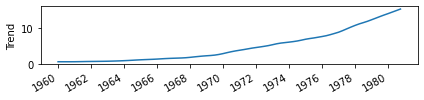

In [8]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.trend)
ax.set_ylabel('Trend')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F04_peixeiro.png', dpi=300)

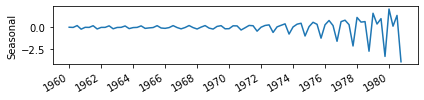

In [9]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F05_peixeiro.png', dpi=300)

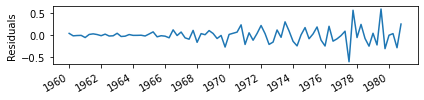

In [10]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.resid)
ax.set_ylabel('Residuals')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F06_peixeiro.png', dpi=300)

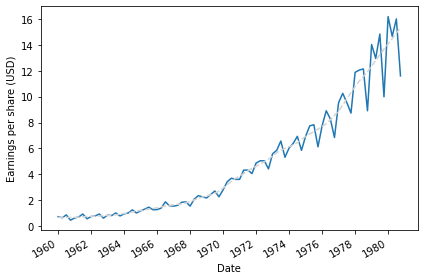

In [12]:
# fig, ax = plt.subplots()

# ax.plot(df.date, df.data)
# ax.plot(advanced_decomposition.trend, color='lightgrey', linestyle='--', label='Trend')
# ax.set_xlabel('Date')
# ax.set_ylabel('Earnings per share (USD)')

# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# fig.autofmt_xdate()
# plt.tight_layout()

# plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)